In [51]:
!pip install statsmodels

  Using cached statsmodels-0.14.5-cp313-cp313-macosx_11_0_arm64.whl.metadata (9.5 kB)
  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
Using cached statsmodels-0.14.5-cp313-cp313-macosx_11_0_arm64.whl (9.7 MB)
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [statsmodels] [statsmodels]


Data Science Job Salaries Dataset contains 11 columns, each are: <br>

- work_year: The year the salary was paid. 
- experience_level: The experience level in the job during the year
- employment_type: The type of employment for the role
- job_title: The role worked in during the year.
- salaryinusd: The salary in USD
- employee_residence: Employee's primary country of residence in during the work year as an ISO 3166 country code.
- remote_ratio: The overall amount of work done remotely
- company_location: The country of the employer's main office or contracting branch
- company_size: The median number of people that worked for the company during the year

## Tasks

Using the assigned dataset, your group should:
- Develop a central prediction problem to investigate.
- Formulate clear objectives based on the identified problem.
- Clean the data and conduct exploratory data analysis to uncover patterns that help answer your problem.
- Build and compare prediction models to achieve your objectives, selecting the most appropriate one.
- Interpret your results and present well-supported conclusions.

In [73]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy.stats import chi2_contingency

sns.set_theme(style="whitegrid") 

## Loading Cleaned Data

In [3]:
df = pd.read_csv("salaries_cleaned.csv")

## Recoding

### Experience level

<p> Experience level: Ordinal level variable<p>

- EN = Entry-level
- MI = Mid-level
- SE = Senior-level
- EX = Expert-level

Recorded to 

- EN = 1
- MI = 2
- SE = 3
- EX = 4

In [4]:
df["experience_level"] = df["experience_level"].map({"EN":1,"MI":2,"SE":3,"EX":4})

### Company Size

<p>Company size: Ordinal variable <p>

- m = medium
- s = small
- l = Large

Recoded to

- s = 1
- m = 2
- l = 3

In [5]:
df["company_size"] = df["company_size"].map({"S":1,"M":2,"L":3})

# Descriptive Statistics

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105434 entries, 0 to 105433
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   work_year           105434 non-null  int64 
 1   experience_level    105434 non-null  int64 
 2   employment_type     105434 non-null  object
 3   job_title           105434 non-null  object
 4   salary_in_usd       105434 non-null  int64 
 5   employee_residence  105434 non-null  object
 6   remote_ratio        105434 non-null  int64 
 7   company_location    105434 non-null  object
 8   company_size        105434 non-null  int64 
dtypes: int64(5), object(4)
memory usage: 7.2+ MB


In [7]:
for column in df.columns:
    print(f"Column is {column}")
    print(df[column].describe())
    print("--------------------------------------------- \n")

Column is work_year
count    105434.000000
mean       2024.188981
std           0.669665
min        2020.000000
25%        2024.000000
50%        2024.000000
75%        2025.000000
max        2025.000000
Name: work_year, dtype: float64
--------------------------------------------- 

Column is experience_level
count    105434.000000
mean          2.531650
std           0.693621
min           1.000000
25%           2.000000
50%           3.000000
75%           3.000000
max           4.000000
Name: experience_level, dtype: float64
--------------------------------------------- 

Column is employment_type
count     105434
unique         4
top           FT
freq      104865
Name: employment_type, dtype: object
--------------------------------------------- 

Column is job_title
count             105434
unique               242
top       Data Scientist
freq               14938
Name: job_title, dtype: object
--------------------------------------------- 

Column is salary_in_usd
count    105434.

### Visualizations

### Univarite distribution

In [8]:
def bar_chart(column_name):
    plt.subplot(111)
    sns.barplot(
        x= df[column_name].value_counts().index,
        y=df[column_name].value_counts(),
        errorbar=None  
    )

    plt.title(f"Distribution of {column_name}")
    plt.xlabel(column_name)
    plt.ylabel("Frequency")
    plt.show()
    

def pie_chart(column_name):
    plt.subplot(111)
    
    plt.pie(x =df[column_name].value_counts(),
            labels = df[column_name].value_counts().index,
            autopct='%1.1f%%'
            )
    #plt.legend()
    
    plt.title(f"Distribution of {column_name}")
    plt.show()
    

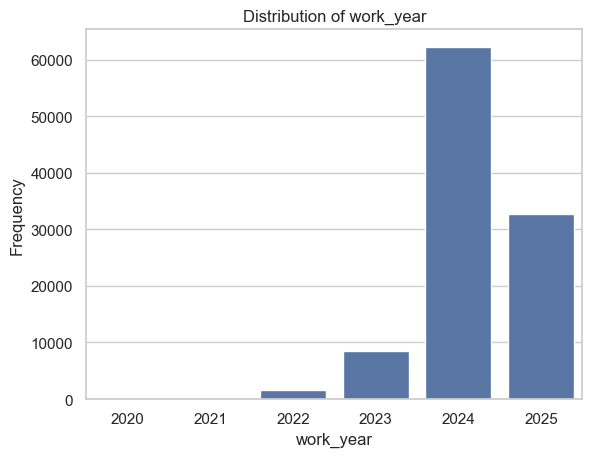

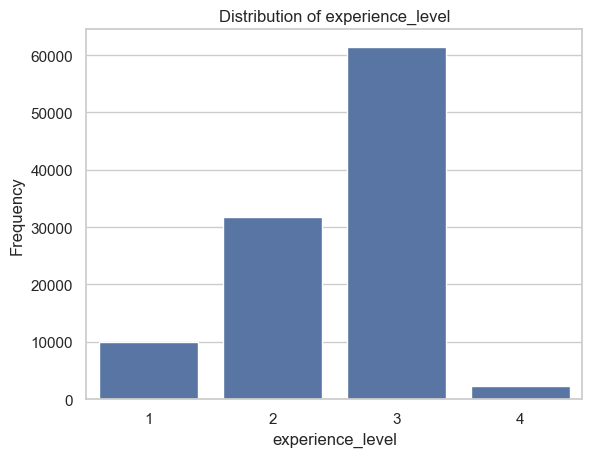

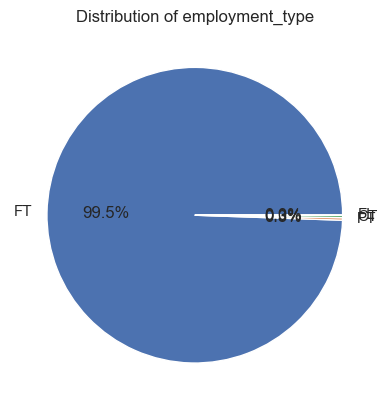

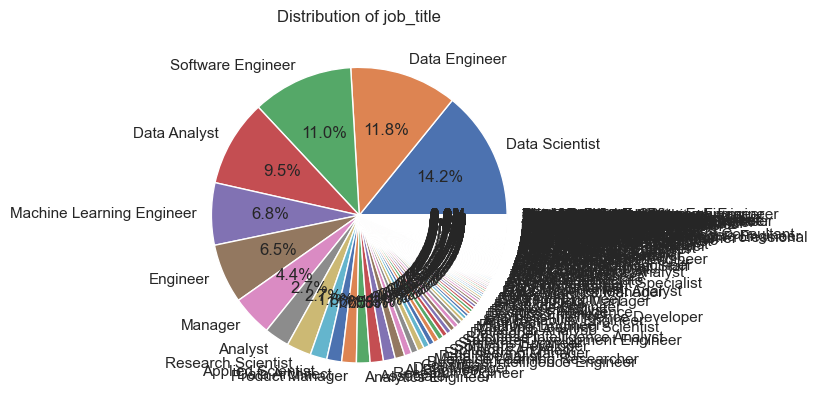

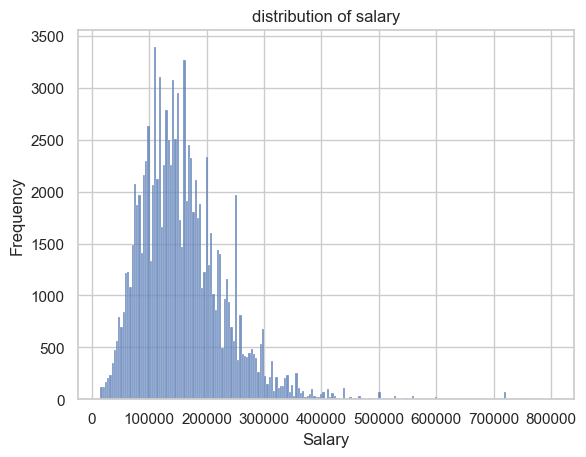

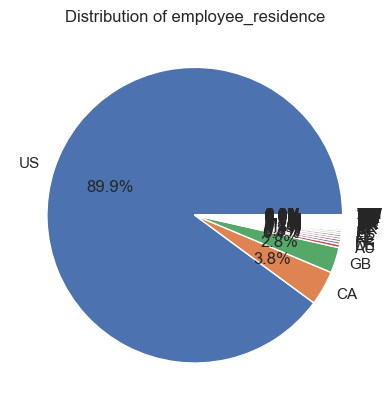

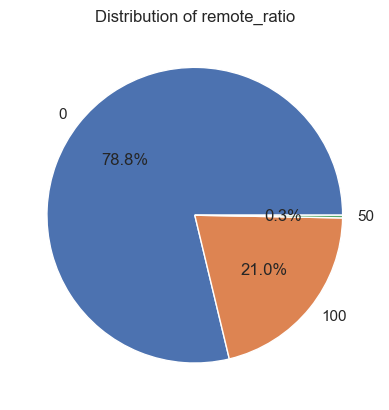

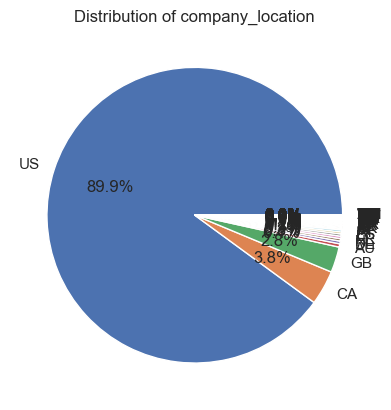

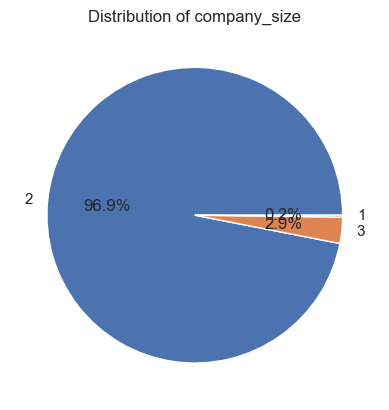

In [9]:
bar_chart("work_year")

bar_chart("experience_level")

pie_chart("employment_type")

pie_chart("job_title")


sns.histplot(data= df,
             x="salary_in_usd")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.title("distribution of salary")
plt.show()

pie_chart("employee_residence")

pie_chart("remote_ratio")

pie_chart("company_location")


pie_chart("company_size")


### Extreme values

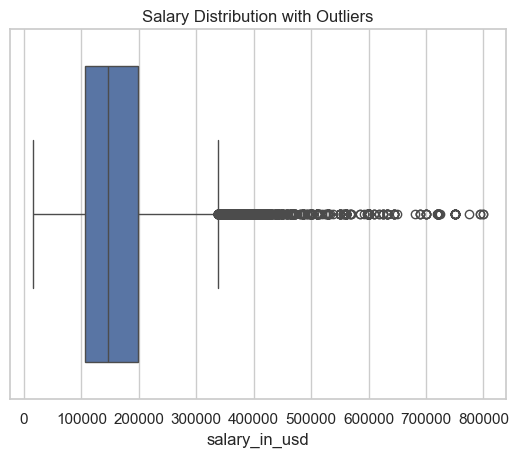

In [61]:
sns.boxplot(x=df["salary_in_usd"])
plt.title("Salary Distribution with Outliers")
plt.show()

In [64]:
df_copy = df.copy()

df_copy["z_values"] = (df["salary_in_usd"] - df["salary_in_usd"].mean())/ df["salary_in_usd"].std()

extreme = df_copy[(df_copy["z_values"] > 3) | (df_copy["z_values"] < -3)]
extreme

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,z_values
82,2025,3,FT,Engineer,440000,US,0,US,2,3.789986
90,2025,3,FT,Research Engineer,440000,US,0,US,2,3.789986
180,2025,2,FT,Research Scientist,410000,US,0,US,2,3.386770
182,2025,2,FT,Research Scientist,389500,US,0,US,2,3.111239
276,2025,3,FT,Site Reliability Engineer,720000,US,0,US,2,7.553341
...,...,...,...,...,...,...,...,...,...,...
105159,2022,3,FT,Data Analytics Lead,405000,US,100,US,3,3.319567
105216,2020,2,FT,Research Scientist,450000,US,0,US,2,3.924392
105361,2021,4,CT,Principal Data Scientist,416000,US,100,US,1,3.467413
105426,2021,2,FT,Applied Machine Learning Scientist,423000,US,50,US,3,3.561497


In [66]:
print(f"proportion of extreme values {(len(extreme)/len(df))*100}")

proportion of extreme values 1.0461520951495722


In [68]:
outliers = df_copy[df_copy["z_values"] > 3]
non_outliers = df_copy[df_copy["z_values"] <= 3]

r_full = df["salary_in_usd"].corr(df["experience_level"], method="spearman")
r_no_outliers = non_outliers["salary_in_usd"].corr(non_outliers["experience_level"], method="spearman")

print(f"Correlation with outliers: {r_full:.3f}")
print(f"Correlation without outliers: {r_no_outliers:.3f}")

Correlation with outliers: 0.348
Correlation without outliers: 0.353


### Exploratary

### job title

In [10]:
#No of people with job title
occupation  = df["job_title"].value_counts().reset_index().sort_values("count",ascending=False)
occupation["pct"] = ((occupation["count"]/occupation["count"].sum())*100).round(2)

occupation

,job_title,count,pct
0,Data Scientist,14938,14.17
1,Data Engineer,12392,11.75
2,Software Engineer,11635,11.04
3,Data Analyst,10024,9.51
4,Machine Learning Engineer,7169,6.80
...,...,...,...
237,Admin & Data Analyst,5,0.00
238,Lead Machine Learning Engineer,5,0.00
239,Machine Learning Research Engineer,5,0.00
240,Computer Vision Software Engineer,5,0.00


/var/folders/c8/r0g7l7m1039ghplj6z5yp5v40000gn/T/ipykernel_85911/3177131433.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title="Job Title")


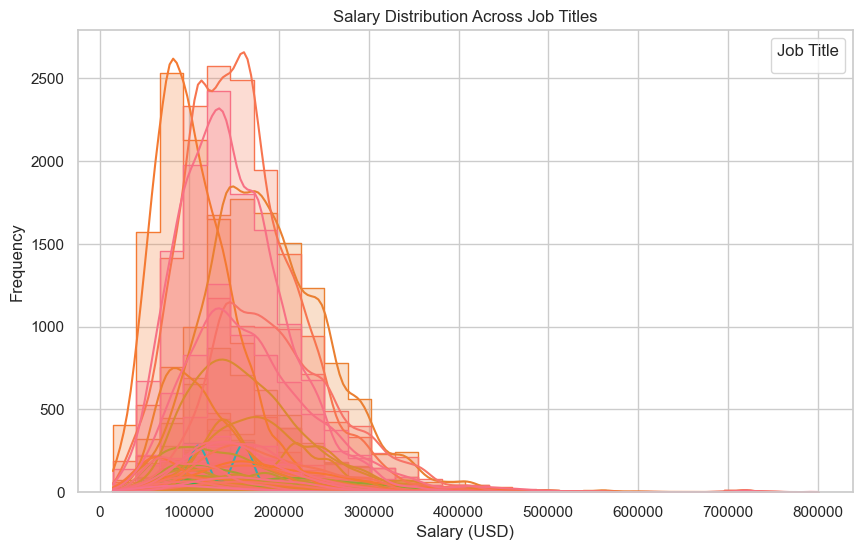

In [11]:

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="salary_in_usd", hue="job_title", kde=True, element="step", bins=30)
#hue="job_title": separate distributions by job title (different colors)

plt.title("Salary Distribution Across Job Titles")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.legend(title="Job Title")
plt.show()

In [81]:

#mean salaries

df.groupby(["job_title"])["salary_in_usd"].mean().round(2).reset_index().sort_values("salary_in_usd",ascending=False)


,job_title,salary_in_usd
147,Head of Machine Learning,283573.55
132,Director of Product Management,270407.14
137,Engineering Manager,258278.71
138,Enterprise Account Executive,256074.48
131,Director of Machine Learning,254689.58
...,...,...
37,Big Data Engineer,65065.79
218,Scala Spark Developer,57531.67
209,Research Assistant,53826.80
49,Clinical Data Operator,37200.00


In [82]:
#considering the median given the skewness of the distribution

median_salaries = df.groupby(["job_title"])["salary_in_usd"].median().reset_index().sort_values("salary_in_usd",ascending=False)
median_salaries

,job_title,salary_in_usd
147,Head of Machine Learning,299000.0
132,Director of Product Management,265650.0
137,Engineering Manager,240000.0
166,Machine Learning Model Engineer,230000.0
145,Head of AI,228500.0
...,...,...
152,Lead Data Analyst,53807.5
8,AI Research Engineer,50136.5
209,Research Assistant,49500.0
49,Clinical Data Operator,36000.0


In [83]:
#salaries based on the highest occuring job titles
salaries = median_salaries.merge(occupation,on="job_title")
salaries.sort_values("pct",ascending=False)

,job_title,salary_in_usd,count,pct
81,Data Scientist,150000.0,14938,14.17
105,Data Engineer,140000.0,12392,11.75
36,Software Engineer,180000.0,11635,11.04
183,Data Analyst,99000.0,10024,9.51
22,Machine Learning Engineer,188000.0,7169,6.80
...,...,...,...,...
208,Data Analytics Engineer,79197.0,5,0.00
216,Machine Learning Research Engineer,73824.0,5,0.00
233,Admin & Data Analyst,60000.0,5,0.00
203,Lead Machine Learning Engineer,84053.0,5,0.00


In [ ]:
#ANOVA testing

#salary_in_usd continous/numerical
#job_title nominal/catogorical

#h0 no significant difference between means between job titles
#h1 at least one group mean differs significantly.

groups = [group["salary_in_usd"].values for name, group in df.groupby("job_title")]

f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3f}")

#p < 0.05 → at least one group mean differs significantly.
#p ≥ 0.05 → no significant difference between means.


F-statistic: 104.561
P-value: 0.000


### does salary change with the ammount of experience

In [84]:
df["experience_level"].corr(df["salary_in_usd"], method="spearman")

np.float64(0.34831589289420817)

In [85]:
df.groupby(["experience_level"])["salary_in_usd"].median()

experience_level
1     87270.5
2    130800.0
3    161200.0
4    192300.0
Name: salary_in_usd, dtype: float64

In [ ]:
#how the spread of salary for the highest frequency job title data scientist

data_scientist = df[df["job_title"]=="Data Scientist"]

data_scientist.groupby(["experience_level"])["salary_in_usd"].median()

experience_level
1     94150.0
2    129800.0
3    160000.0
4    190000.0
Name: salary_in_usd, dtype: float64

In [ ]:
#correlation between experience level and salary for data scientists
data_scientist["experience_level"].corr(data_scientist["salary_in_usd"], method="spearman")

np.float64(0.31026494133253124)

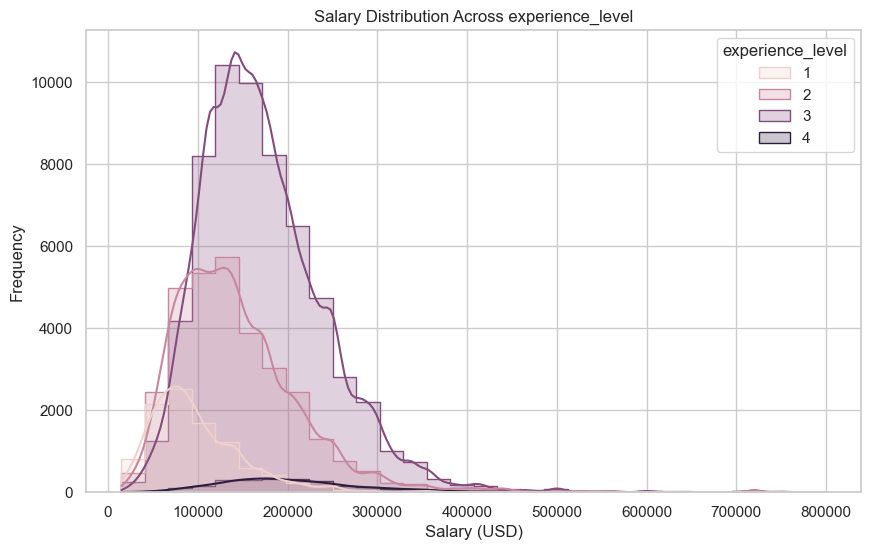

In [88]:

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="salary_in_usd", hue="experience_level", kde=True, element="step", bins=30)
#hue="job_title": separate distributions by job title (different colors)

plt.title("Salary Distribution Across experience_level")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

In [ ]:
#ANOVA testing

#salary_in_usd continous/numerical
#experience level nominal/catogorical

#h0 no significant difference between means between job titles
#h1 at least one group mean differs significantly.

groups = [group["salary_in_usd"].values for name, group in df.groupby("experience_level")]

f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3f}")

#p < 0.05 → at least one group mean differs significantly.
#p ≥ 0.05 → no significant difference between means.

F-statistic: 3947.783
P-value: 0.000


### does salary change depending on the mode of work(fully remote, half remote and full physical)

In [31]:
df.groupby(["remote_ratio"])["salary_in_usd"].median()

remote_ratio
0      148007.0
50      68276.0
100    144600.0
Name: salary_in_usd, dtype: float64

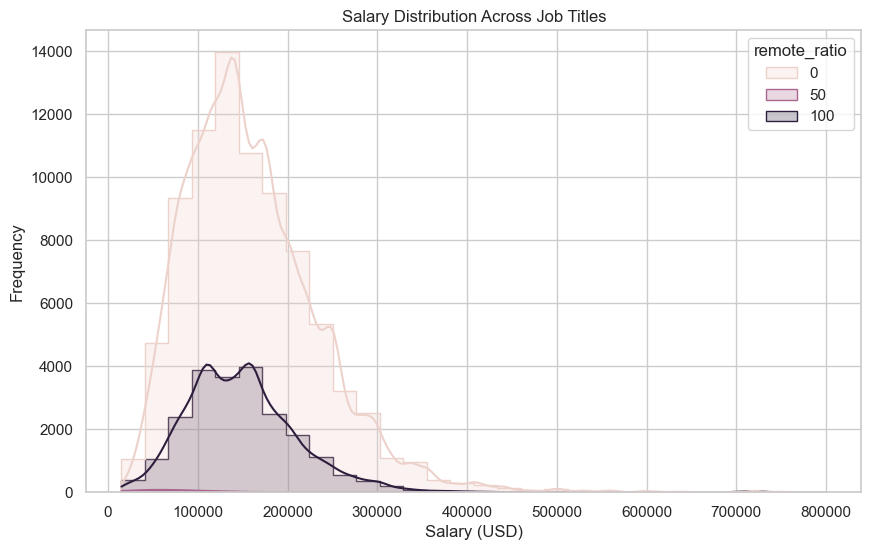

In [32]:

plt.figure(figsize=(10,6))
sns.histplot(data=df, x="salary_in_usd", hue="remote_ratio", kde=True, element="step", bins=30)
#hue="job_title": separate distributions by job title (different colors)

plt.title("Salary Distribution Across Job Titles")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

In [54]:
df["remote_ratio"].corr(df["salary_in_usd"], method="spearman")

np.float64(-0.05040235180875516)

In [55]:
#ANOVA testing

#salary_in_usd continous/numerical
#remote_ratio nominal/catogorical

#h0 no significant difference between means between job titles
#h1 at least one group mean differs significantly.

groups = [group["salary_in_usd"].values for name, group in df.groupby("remote_ratio")]

f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3f}")

#p < 0.05 → at least one group mean differs significantly.
#p ≥ 0.05 → no significant difference between means.

F-statistic: 334.089
P-value: 0.000


### does company size affet the salary

In [37]:
df.groupby(["company_size"])["salary_in_usd"].median()

company_size
1     75648.0
2    147000.0
3    143100.0
Name: salary_in_usd, dtype: float64

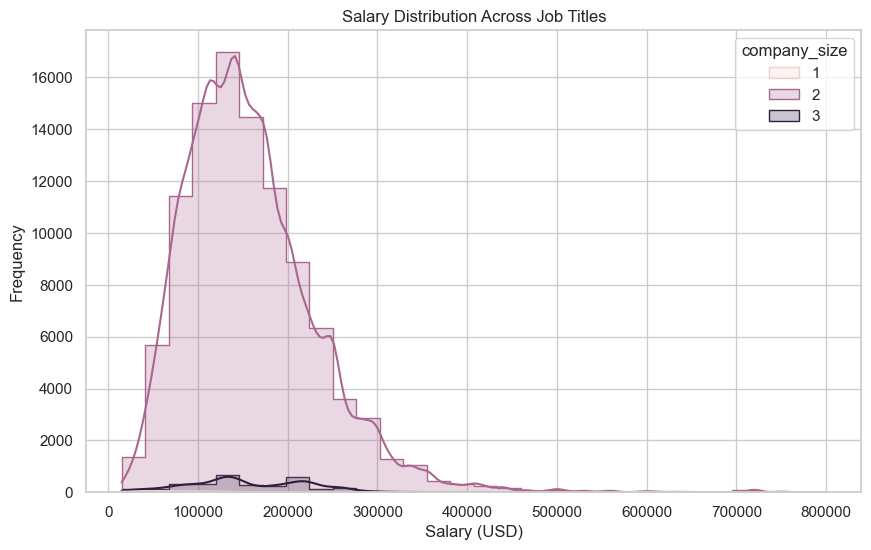

In [36]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x="salary_in_usd", hue="company_size", kde=True, element="step", bins=30)
#hue="job_title": separate distributions by job title (different colors)

plt.title("Salary Distribution Across Job Titles")
plt.xlabel("Salary (USD)")
plt.ylabel("Frequency")
plt.show()

In [38]:
df["company_size"].corr(df["salary_in_usd"],method="spearman")

np.float64(0.01737184231069221)

In [56]:
#ANOVA testing

#salary_in_usd continous/numerical
#company_size nominal/catogorical

#h0 no significant difference between means between job titles
#h1 at least one group mean differs significantly.

groups = [group["salary_in_usd"].values for name, group in df.groupby("company_size")]

f_stat, p_value = stats.f_oneway(*groups)

print(f"F-statistic: {f_stat:.3f}")
print(f"P-value: {p_value:.3f}")

#p < 0.05 → at least one group mean differs significantly.
#p ≥ 0.05 → no significant difference between means.

F-statistic: 95.120
P-value: 0.000


### Count based on location of company


In [69]:
#count of employees by country
df.groupby(["company_location"])["salary_in_usd"].count().reset_index().sort_values("salary_in_usd",ascending=False)

,company_location,salary_in_usd
86,US,94834
12,CA,3987
32,GB,2962
6,AU,378
22,DE,311
...,...,...
34,GI,1
17,CN,1
13,CD,1
11,BS,1


In [70]:
df.groupby(["company_location"])["salary_in_usd"].median()

company_location
AD     50745.0
AE     95000.0
AM     46200.0
AR     66600.0
AS     38500.0
        ...   
VE    192500.0
VN     60000.0
XK     41052.0
ZA     55328.0
ZM     60000.0
Name: salary_in_usd, Length: 92, dtype: float64

### is there an association between experience level and job title?

- Variable 1: experience_level — categorical (e.g., EN, MI, SE, EX)
- Variable 2: job_title — categorical (e.g., Data Scientist, ML Engineer, Analyst, etc.)

<br>
<br>

- H0 → There is a significant association between experience level and job title. (They are dependent.)
- H1 → No evidence of a relationship; they are independent.

<br>

- p < 0.05 Reject H₀ 
- p ≥ 0.05 Fail to reject H₀




In [74]:
# Create contingency table
table = pd.crosstab(df["experience_level"], df["job_title"])

# Perform chi-square test
chi2, p, dof, expected = chi2_contingency(table)

print("Chi-square statistic:", chi2)
print("Degrees of freedom:", dof)
print("P-value:", p)

Chi-square statistic: 48979.59617696266
Degrees of freedom: 723
P-value: 0.0


### Linear Regression

<p> To see how the independent variables influence the dependant variable salary<p>

In [75]:
# Assume df is your salaries dataset
categorical_cols = ['job_title', 'employee_residence', 'company_location',"employment_type"]

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [76]:
from statsmodels.formula.api import ols

model = ols('salary_in_usd ~ C(experience_level) + C(remote_ratio) + C(company_size)', data=df).fit()


In [77]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.110
Method:                 Least Squares   F-statistic:                     1858.
Date:                Thu, 16 Oct 2025   Prob (F-statistic):               0.00
Time:                        21:37:09   Log-Likelihood:            -1.3261e+06
No. Observations:              105434   AIC:                         2.652e+06
Df Residuals:                  105426   BIC:                         2.652e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept               

In [78]:
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq        df            F         PR(>F)
C(experience_level)  5.986007e+13       3.0  4049.052761   0.000000e+00
C(remote_ratio)      4.480907e+12       2.0   454.645964  2.491146e-197
C(company_size)      4.120951e+11       2.0    41.812381   7.051994e-19
Residual             5.195296e+14  105426.0          NaN            NaN
